In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [61]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [60]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
#PATH = "data/dogscats/"
PATH = "data/distractedDriver/"

In [5]:
sz=224

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [271]:
%cd
!ls

/home/ubuntu
data  fastai  google-images-download  src


In [ ]:
%mkdir distractedDriver

In [ ]:
!kg download -u <username> -p <password> -c 'state-farm-distracted-driver-detection'

In [272]:
!ls {PATH} 

driver_imgs_list.csv.zip  sample_submission.csv.zip  test  train  valid


In [273]:
!ls {PATH}train

c0  c1	c2  c3	c4  c5	c6  c7	c8  c9	valid


In [233]:
%mkdir {PATH}valid

In [235]:
%mkdir {PATH}valid/c0
%mkdir {PATH}valid/c1
%mkdir {PATH}valid/c2
%mkdir {PATH}valid/c3
%mkdir {PATH}valid/c4
%mkdir {PATH}valid/c5
%mkdir {PATH}valid/c6
%mkdir {PATH}valid/c7
%mkdir {PATH}valid/c8
%mkdir {PATH}valid/c9

In [274]:
%cd
%cd {PATH}
!ls

/home/ubuntu
/home/ubuntu/data/distractedDriver
driver_imgs_list.csv.zip  sample_submission.csv.zip  test  train  valid


In [255]:
import shutil
%cd
%cd {PATH}train/c9
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(500): shutil.copyfile(shuf[i], "/home/ubuntu/data/distractedDriver/valid/c9/" + shuf[i])

/home/ubuntu
/home/ubuntu/data/distractedDriver/train/c9


In [29]:
%mkdir {PATH}train/valid

In [31]:
%mkdir {PATH}train/valid/c0
%mkdir {PATH}train/valid/c1
%mkdir {PATH}train/valid/c2
%mkdir {PATH}train/valid/c3
%mkdir {PATH}train/valid/c4
%mkdir {PATH}train/valid/c5
%mkdir {PATH}train/valid/c6
%mkdir {PATH}train/valid/c7
%mkdir {PATH}train/valid/c8
%mkdir {PATH}train/valid/c9

In [138]:
!ls {PATH}train/valid

ls: cannot access 'data/distractedDriver/train/valid': No such file or directory


In [177]:
%cd
%cd {PATH}
%cd train
%cd valid
!ls

/home/ubuntu
/home/ubuntu/data/distractedDriver
/home/ubuntu/data/distractedDriver/train
/home/ubuntu/data/distractedDriver/train/valid
c0  c1	c2  c3	c4  c5	c6  c7	c8  c9


In [174]:
import shutil
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(500): shutil.move(shuf[i], "/home/ubuntu/data/distractedDriver/train/valid/c9/" + shuf[i])

In [207]:
%cd
files0 = !ls {PATH}train/c0/ | head
files1 = !ls {PATH}train/c1 | head
files2 = !ls {PATH}train/c2 | head
files3 = !ls {PATH}train/c3 | head
files4 = !ls {PATH}train/c4 | head
files5 = !ls {PATH}train/c5 | head
files6 = !ls {PATH}train/c6 | head
files7 = !ls {PATH}train/c7 | head
files8 = !ls {PATH}train/c8 | head
files9 = !ls {PATH}train/c9 | head
files9

/home/ubuntu


['img_100090.jpg',
 'img_100100.jpg',
 'img_100190.jpg',
 'img_100286.jpg',
 'img_100294.jpg',
 'img_100299.jpg',
 'img_100327.jpg',
 'img_100379.jpg',
 'img_100394.jpg',
 'img_100428.jpg']

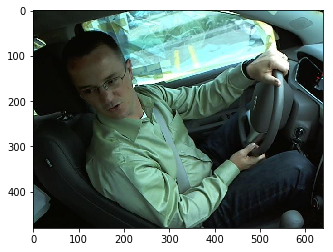

In [210]:
img = plt.imread(f'{PATH}train/c0/{files0[0]}')
plt.imshow(img);

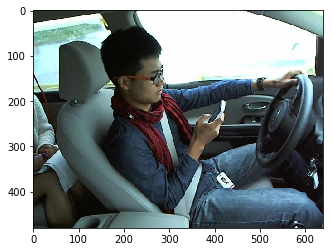

In [211]:
img = plt.imread(f'{PATH}train/c1/{files1[0]}')
plt.imshow(img);

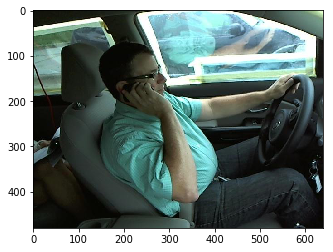

In [212]:
img = plt.imread(f'{PATH}train/c2/{files2[0]}')
plt.imshow(img);

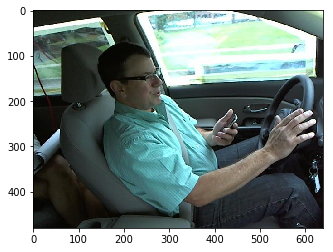

In [213]:
img = plt.imread(f'{PATH}train/c3/{files3[0]}')
plt.imshow(img);

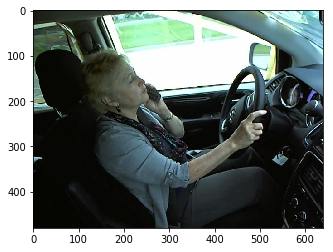

In [214]:
img = plt.imread(f'{PATH}train/c4/{files4[0]}')
plt.imshow(img);

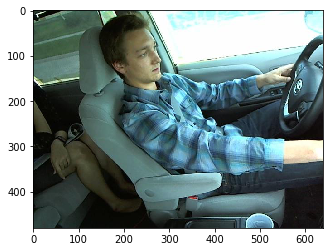

In [215]:
img = plt.imread(f'{PATH}train/c5/{files5[0]}')
plt.imshow(img);

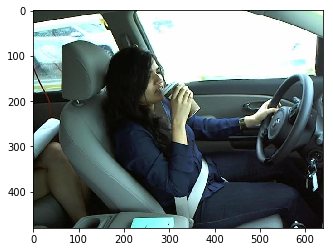

In [216]:
img = plt.imread(f'{PATH}train/c6/{files6[0]}')
plt.imshow(img);

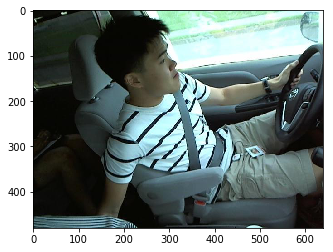

In [217]:
img = plt.imread(f'{PATH}train/c7/{files7[0]}')
plt.imshow(img);

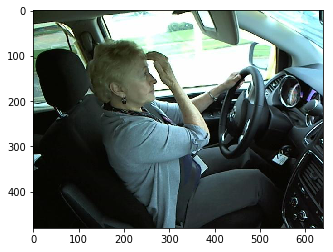

In [218]:
img = plt.imread(f'{PATH}train/c8/{files8[0]}')
plt.imshow(img);

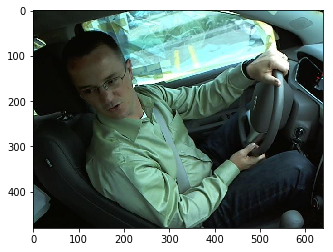

In [219]:
img = plt.imread(f'{PATH}train/c9/{files9[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [221]:
img.shape

(480, 640, 3)

In [222]:
img[:4,:4] #First four rows and columns that have RGB values

array([[[29, 39, 31],
        [28, 38, 30],
        [28, 38, 30],
        [27, 37, 29]],

       [[26, 36, 28],
        [26, 36, 28],
        [25, 35, 27],
        [24, 34, 26]],

       [[23, 33, 25],
        [22, 32, 24],
        [22, 32, 24],
        [21, 31, 23]],

       [[22, 29, 22],
        [22, 29, 22],
        [22, 29, 22],
        [21, 28, 21]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [287]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

In [288]:
!cd {PATH} && rm -rf .ipynb_checkpoints

In [290]:
%cd
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3) #Three epochs: study each image 3 times

/home/ubuntu

100%|██████████| 79/79 [00:28<00:00,  2.80it/s]


A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                    
    0      0.515086   0.187064   0.956092  
    1      0.335059   0.101199   0.974288                    
    2      0.268444   0.073556   0.98121                     



[0.073555663, 0.98121044303797467]

How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [291]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 9, 9, 9])

In [292]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'valid']

In [293]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(5000, 10)

In [294]:
log_preds[:10]

array([[ -0.00779, -10.04017, -13.14863,  -9.0739 ,  -7.9125 ,  -8.07329, -11.23273, -10.26943, -11.39697,
         -4.98118],
       [ -0.11054,  -9.59815,  -9.03766,  -9.18664,  -7.75982,  -8.07322,  -8.09116,  -6.47065,  -3.81171,
         -2.53007],
       [ -0.06622,  -6.56043,  -7.27751,  -5.63402,  -6.29424,  -4.61185,  -7.65031,  -3.72901,  -4.77643,
         -4.29049],
       [ -0.0047 ,  -9.57812, -11.50453,  -6.6301 ,  -9.01976,  -8.17141, -10.35448, -10.57404,  -7.95649,
         -6.00048],
       [ -0.00691,  -9.5215 , -11.04293,  -5.44611,  -8.86023,  -7.97044,  -9.41647, -13.91461,  -7.89571,
         -6.47644],
       [ -1.82978,  -3.82627,  -6.08956,  -4.2363 ,  -2.75471,  -1.99367,  -4.54767,  -3.53906,  -3.34212,
         -0.64204],
       [ -0.03829,  -6.2344 , -12.4548 ,  -6.78269, -10.96375,  -6.62289,  -9.41434,  -5.85887,  -7.79419,
         -3.51414],
       [ -0.01909,  -6.51889, -11.32649,  -7.09758,  -4.18406,  -8.67514,  -7.00604, -11.88314, -10.30175,
    

In [295]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [296]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [297]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [298]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [299]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


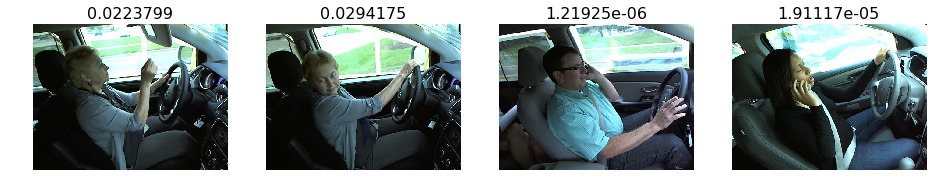

In [300]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


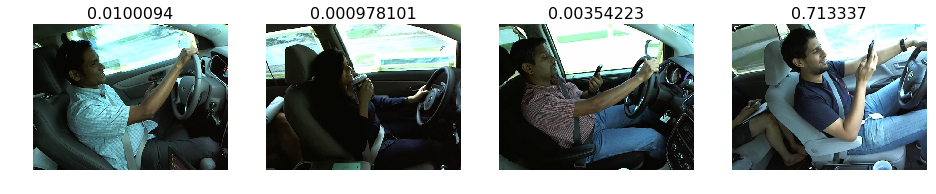

In [301]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")